<a href="https://colab.research.google.com/github/davidguzmanr/Aprendizaje-Profundo/blob/main/Tareas/Tarea-1/Tarea_1_ejercicio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 1: perceptrón y redes densas

- **E. David Guzmán Ramírez**
- **Introducción al Aprendizaje Profundo 2021-II**
- **Licenciatura en Ciencia de Datos CU UNAM**

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

import torch
from tqdm import trange, tqdm

sns.set_style('darkgrid')

## Ejercicio 2

Extiende el ejercicio de [1c reglin.ipynb](https://github.com/bereml/iap/blob/master/libretas/1c_reglin.ipynb) visto en clase para realizar regresión lineal con los dos atributos de entrada (únicamente puedes hacer uso de tensores). (2 puntos)


**Solución.** Ahora queremos que

$$ \hat{y} = w_{1}x_{1} + w_{2}y_{2} + b, $$

donde $\hat{y}$ es nuestra predicción de la calificación.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/bereml/iap/master/datos/califs.csv')
df.head()

,prev,horas,calif
0,5.6,8.2,5.1
1,6.7,9.3,5.9
2,5.1,10.0,5.4
3,5.7,10.4,6.5
4,7.1,10.4,6.7


In [5]:
X = torch.tensor(df.iloc[:, 0:2].values)
y_true = torch.tensor(df.iloc[:, 2].values) 
y_true = y_true.view(-1, 1).type(torch.float64) # reshape

X[0:5, :], y_true[0:5]

(tensor([[ 5.6000,  8.2000],
         [ 6.7000,  9.3000],
         [ 5.1000, 10.0000],
         [ 5.7000, 10.4000],
         [ 7.1000, 10.4000]], dtype=torch.float64), tensor([[5.1000],
         [5.9000],
         [5.4000],
         [6.5000],
         [6.7000]], dtype=torch.float64))

In [6]:
def train(X, y_true, alpha=0.01, steps=100):
    """Fits linear regression."""

    # ejemplos, atributos
    m, d = X.shape

    # inicialización de parámetros
    w = torch.zeros(size=(d,1), dtype=torch.float64)
    b = torch.zeros(1)

    # histórico de pérdidas
    loss_hist = []

    # ciclo de entrenamiento
    for i in range(steps):

        # cómputo de la hipótesis
        y_pred = X @ w + b

        # cómputo de la pérdida
        loss = (y_pred - y_true).T @ (y_pred - y_true) / (2 * m)

        # cómputo del gradiente
        grad_w = (X.T @ (y_pred - y_true)) / m
        grad_b = (y_pred - y_true).sum() / m

        # actualización de parámetros
        w = w - alpha * grad_w
        b = b - alpha * grad_b

        # histórico de pérdida
        loss_hist.append(loss)

    return w, b, loss_hist

In [11]:
# Entrenamos
w, b, loss_hist = train(X, y_true, alpha=0.01, steps=1000)
w1, w2 = w.flatten().numpy()
w, b

(tensor([[0.2330],
         [0.4756]], dtype=torch.float64), tensor([0.0121]))

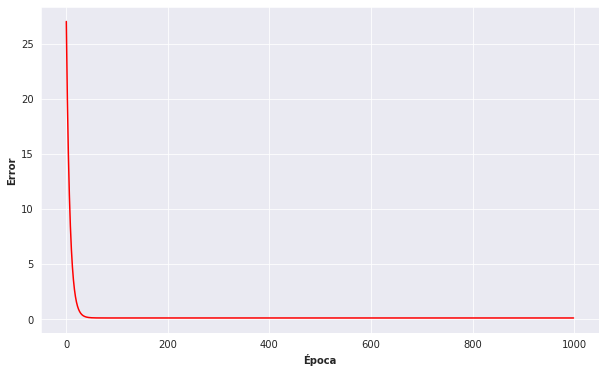

In [13]:
plt.figure(figsize=(10,6))
plt.plot(loss_hist, color='red')
plt.xlabel('Época', weight='bold')
plt.ylabel('Error', weight='bold')

plt.show()

In [17]:
x1 = np.linspace(df['prev'].min(), df['prev'].max(), 20)
x2 = np.linspace(df['horas'].min(), df['horas'].max(), 20)

X1, X2 = np.meshgrid(x1, x2)
Z = w1*X1 + w2*X2 + b.numpy()

# Ver https://community.plotly.com/t/3d-scatter-plot-with-surface-plot/27556
layout = go.Layout(width=500, height=500)
fig = go.Figure(data=[go.Surface(x=X1, y=X2, z=Z, colorscale='Blues')], layout=layout)
fig.update_traces(showscale=False)
fig.add_scatter3d(x=df['prev'], y=df['horas'], z=df['calif'], mode='markers', marker=dict(size=2, colorscale='Reds'))

fig.show()